In [245]:
# import needed library
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from random import seed
from random import random
%matplotlib inline

In [246]:
# input training data
data = np.loadtxt("HW6_data.txt")
label = np.zeros([400,1])
dataset = np.zeros([400,3])
dataset = data
label = data[:,2]
dataset = dataset.tolist()
for n in dataset:
    n[2]=int(n[2])

In [247]:
# Initialize a network
def init_network(num_inputs, num_hidden, num_outputs):
    network = list()
    hidden_layer1 = [{'weights':[random() for i in range(num_inputs + 1)]} for i in range(num_hidden)]
    network.append(hidden_layer1)
    output_layer = [{'weights':[random() for i in range(num_hidden + 1)]} for i in range(num_outputs)]
    network.append(output_layer)
    return network

In [248]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation

# Transfer neuron activation
def sigmoid(activation):
    return 1.0 / (1.0 + exp(-activation))

In [249]:
# Forward propagate input to a network output
def forward_prop(network, row):
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = sigmoid(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

In [250]:
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [251]:
# Update network weights with error
def update_weights(network, row, l_rate):
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_prop(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            #print(expected)
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
def test(network,row):
    outputs = forward_prop(network,row)
    return outputs.index(max(outputs))

In [252]:
# Test training backprop algorithm
seed(1)
num_inputs = len(dataset[0]) - 1
num_outputs = len(set([row[-1] for row in dataset]))
print(num_outputs)
network = initialize_network(2, 2, 2)
train(network, dataset, 0.2, 500, num_outputs)
layer1=[]
for layer in network:
    layer1.append(layer)
    print(layer)

2
[{'weights': [-6.784102502321102, 8.719109655975464, 7.809204321663589], 'output': 0.9999998757452325, 'delta': -2.9298392487367468e-09}, {'weights': [-6.469435459910137, 5.903924700279203, -5.024545255281076], 'output': 0.9036904794408426, 'delta': 0.0017851083822791485}]
[{'weights': [9.092844828927333, -7.909929866179126, -5.213305104751814], 'output': 0.03669041842057237, 'delta': -0.001296794646770188}, {'weights': [-9.093832380865736, 7.910689530670016, 5.213864506821257], 'output': 0.9633187243515253, 'delta': 0.0012961607405302163}]


In [253]:
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            outputs = forward_propagate(network, row)
            expected = [0 for i in range(n_outputs)]
            expected[row[-1]] = 1
            #print(expected)
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))

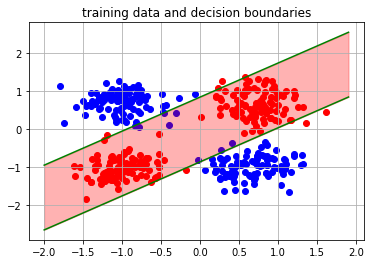

y= 0.8957855644067059 x+ -0.851051717350572
y= 0.8957855644067059 x- -0.851051717350572


In [260]:
# plot the boundary lines
# plot training data
for k in range(0,200):
    plt.scatter(dataset[k][0],dataset[k][1],c='red')
for l in range(200,400):
    plt.scatter(dataset[l][0],dataset[l][1],c='blue')
# plot boundary

w2 = list(layer1[0][1].values())
w21 = w2[0][0]
w22 = w2[0][1]
b2 = w2[0][2]
x = np.arange(-2,2,0.1)
y1 = x*(-w21/w22-0.2)+ b2/w12
y2 = x*(-w21/w22-0.2)- b2/w22
plt.title('training data and decision boundaries')
plt.grid()
plt.plot(x,y1,c='green')
plt.plot(x,y2,c='green')
plt.fill_between(x, y2, y1, y2 > y1, color='#ff0000', alpha=0.3)
plt.show()
print('y=',-w21/w22-0.2,'x+',b2/w12)
print('y=',-w21/w22-0.2,'x-',b2/w12)

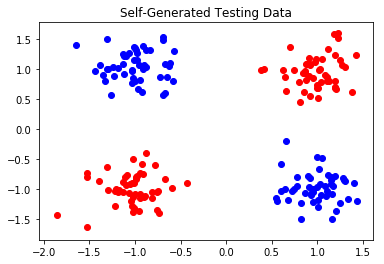

In [232]:
#generate data 
mu_x = [1,-1]
delta_x = 0.25
mu_y = [1,-1]
delta_y = 0.25 
z=np.zeros([200,3])
n=0
plt.title('Self-Generated Testing Data')
for i in range(2):
    for j in range(2):
        x = mu_x[i]+delta_x*np.random.randn(50) 
        y = mu_y[j]+delta_y*np.random.randn(50)
        if mu_x[i]*mu_y[j] == 1:
            plt.scatter(x,y,c = 'red')
            z[n:n+50,0] = x
            z[n:n+50,1] = y
        if mu_x[i]*mu_y[j] == -1:
            plt.scatter(x,y,c='blue')
            z[n:n+50,0] = x
            z[n:n+50,1] = y
            z[n:n+50,2] = z[n:n+50,2]+1
        n=n+50

In [233]:
# test generated data
correct = 0
wrong = 0
for row in z:
    determine = test(network,row)
    if determine == row[-1]:
        correct = correct+1
    else:
        wrong = wrong+1
print('Accuracy of Prediction: ',100*correct/(wrong+correct),'%')

Accuracy of Prediction:  98.5 %


2
[{'weights': [-4.635916588512111, 4.596172324983862, 3.313274101487022], 'output': 0.9999048932178135, 'delta': -2.049198362520636e-05}, {'weights': [-4.419093710246737, 4.291464331059066, -4.224290337916075], 'output': 0.798616086647715, 'delta': 0.03742957114160135}]
[{'weights': [5.546873476865729, -5.991837801380351, -2.4857301732949293], 'output': 0.15262629555470245, 'delta': -0.019739389187370285}, {'weights': [-5.624264763663412, 6.088192684797404, 2.5165241117668615], 'output': 0.8513204767668707, 'delta': 0.018818950466554126}]


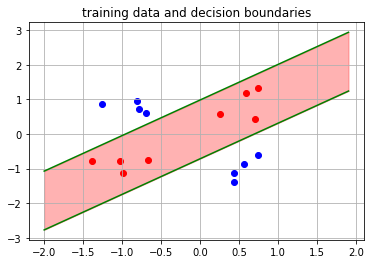

In [243]:
# choose 16 points for training
p16 = np.zeros([16,3])
p16 = [[0.258140455863934,0.567315287097103,0],
       [0.734317095363312,1.3195912881375,0],
       [0.592050478464416,1.19667090632313,0],
       [0.699169771902131,0.433616111743741,0],
      [-0.985097960238142, -1.12082573650756, 0],
      [-1.38177934789019, -0.778890498143647, 0],
      [-1.02250556227963, -0.793451426629458, 0],
      [-0.674450149157024, -0.764088469196094, 0],
      [0.426882921196544, -1.39040516540311, 1], 
       [0.745479567524074, -0.610730018707631, 1], 
       [0.427053593889095, -1.14155143108763, 1], 
       [0.564108502431285, -0.86010860171292, 1],
      [-1.26109374697199, 0.860117010560185, 1], 
       [-0.780648589258112, 0.728503411389706, 1], 
       [-0.805034057569262, 0.963331827863979, 1], 
       [-0.694074012697457, 0.59385595699395, 1]]
seed(1)
num_inputs = len(p16[0]) - 1
num_outputs = len(set([row[-1] for row in p16]))
print(num_outputs)
network = initialize_network(2, 2, 2)
train(network, p16, 0.2, 500, num_outputs)
layer1=[]
for layer in network:
    layer1.append(layer)
    print(layer)
    
# plot the boundary lines
# plot training data
for k in range(0,8):
    plt.scatter(p16[k][0],p16[k][1],c='red')
for l in range(8,16):
    plt.scatter(p16[l][0],p16[l][1],c='blue')
# plot boundary

w2 = list(layer1[0][1].values())
w21 = w2[0][0]
w22 = w2[0][1]
b2 = w2[0][2]
x = np.arange(-2,2,0.1)
y1 = x*(-w21/w22)+ b2/w12
y2 = x*(-w21/w22)- b2/w22
plt.title('training data and decision boundaries')
plt.grid()
plt.plot(x,y1,c='green')
plt.plot(x,y2,c='green')
plt.fill_between(x, y2, y1, y2 > y1, color='#ff0000', alpha=0.3)
plt.show()

1.0297402866112544
